In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [4]:
print(df.info)

<bound method DataFrame.info of               Дата  Склад   Контрагент Номенклатура  Количество
0       2018-01-04      1    address_0    product_0           4
1       2018-01-04      1    address_0    product_1           4
2       2018-01-04      1    address_0    product_2           5
3       2018-01-04      1    address_0    product_3          10
4       2018-01-04      1    address_0    product_4           2
...            ...    ...          ...          ...         ...
301350  2018-08-31      5  address_173   product_15           0
301351  2018-08-31      5  address_173   product_17           1
301352  2018-08-31      5  address_173   product_18           1
301353  2018-08-31      5  address_173   product_19           0
301354  2018-08-31      5  address_173   product_20           2

[301355 rows x 5 columns]>


Проверяем формат столбцов

In [6]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [8]:
df['Дата'] = pd.to_datetime(df['Дата'])
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [14]:
grouped_df = df.groupby('Дата')['Количество'].sum()
print(grouped_df)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


Вывести несколько первых строк сгруппированных данных

In [16]:
print(grouped_df.head())

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64


Нарисуйте график продаж у `grouped_df`

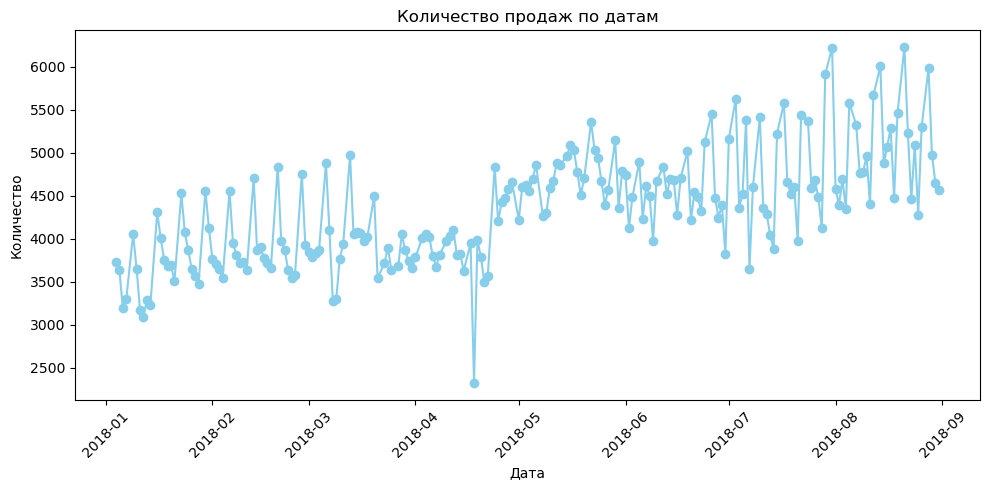

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df, marker='o', linestyle='-', color = 'skyblue') 
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.title('Количество продаж по датам')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Явных выбросов наглядно не выявлено, визуально продажи имеют нормальное стандарное отклонение

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [20]:
max_outlier = df.loc[df['Количество'].idxmax()]

print("Строка с максимальным количеством /продаж:")
print(max_outlier)

Строка с максимальным количеством /продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [24]:
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')

if df['Дата'].isnull().any():
    print("В столбце 'Дата' есть некорректные значения, которые не удалось преобразовать.")
else:
    df_filtered = df[(df['Склад'] == 3) & 
                     (df['Дата'].dt.month.isin([6, 7, 8])) & 
                     (df['Дата'].dt.day_name() == 'Wednesday')]

    grouped_df3 = df_filtered.groupby('Номенклатура')['Количество'].sum()

    top_product = grouped_df3.idxmax()
    top_sales = grouped_df3.max()

    print(f"Топовый товар: {top_product}, Общие продажи: {top_sales}")

Топовый товар: product_1, Общие продажи: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [12]:
pip install xlrd

In [28]:
weather_df = pd.read_excel('weather_astana.xls') 

In [30]:
print(weather_df.head())

        Дата     T
0 2018-08-31   8.2
1 2018-08-31   9.6
2 2018-08-31  11.3
3 2018-08-31  12.3
4 2018-08-31  13.2


In [32]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])

In [34]:
daily_avg_temp = weather_df.groupby(weather_df['Дата'].dt.date)['T'].mean().reset_index()
daily_avg_temp.columns = ['Дата', 'Средняя температура']

In [36]:
daily_avg_temp['Дата'] = pd.to_datetime(daily_avg_temp['Дата'])

In [44]:
combined_df = pd.merge(grouped_df, daily_avg_temp, on='Дата', how='inner')
combined_df

,Дата,Количество,Средняя температура
0,2018-01-04,3734,-14.0750
1,2018-01-05,3643,-16.8625
2,2018-01-06,3193,-13.3000
3,2018-01-07,3298,-12.7500
4,2018-01-09,4055,-6.2500
...,...,...,...
200,2018-08-26,5302,11.9750
201,2018-08-28,5983,14.1125
202,2018-08-29,4969,13.8250
203,2018-08-30,4648,14.1750


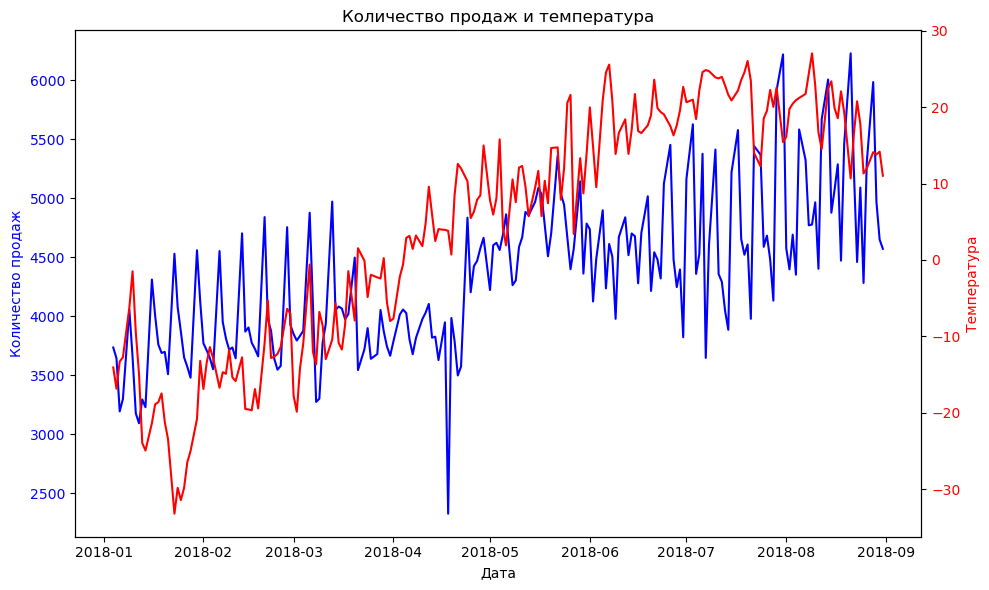

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(combined_df['Дата'], combined_df['Количество'], label='Количество продаж', color='b')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(combined_df['Дата'], combined_df['Средняя температура'], label='Температура', color='r')
ax2.set_ylabel('Температура', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Количество продаж и температура')
fig.tight_layout()
plt.show()

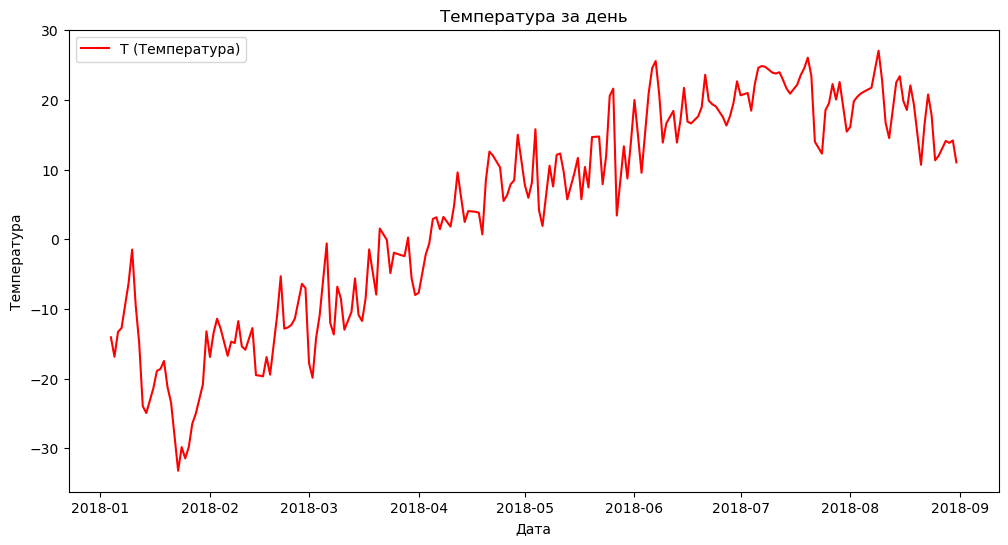

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Дата'], combined_df['Средняя температура'], label='T (Температура)', color='red')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Температура за день')
plt.legend()
plt.show()